In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [24]:
#carga el csv
df = pd.read_csv("archivos/cybersecurity_attacks.csv")

In [51]:
#Consultamos las primeras filas
df.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
46,2023-05-16 13:01:56,170.211.138.30,172.97.181.148,25022,6593,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,...,Blocked,High,Aradhya Kamdar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like M...,Segment A,"Amravati, Kerala",95.170.137.42,Log Data,Alert Data,Firewall


In [26]:
#Eliminanos los valores nulos
df = df.dropna()

In [27]:
#Eliminamos valores duplicados
df = df.drop_duplicates()

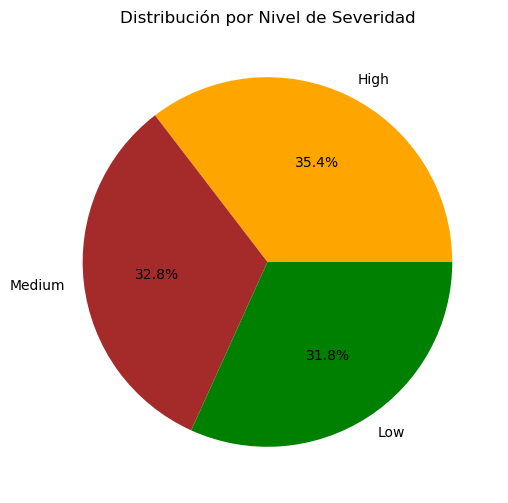

In [32]:
plt.figure(figsize=(6,6))
severity_counts = df["Severity Level"].value_counts()
colors = {'Low': 'green', 'Medium': 'brown', 'High': 'orange', 'critical': 'red'}
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        colors=[colors.get(s, 'gray') for s in severity_counts.index])
plt.title("Distribución por Nivel de Severidad")
plt.show()

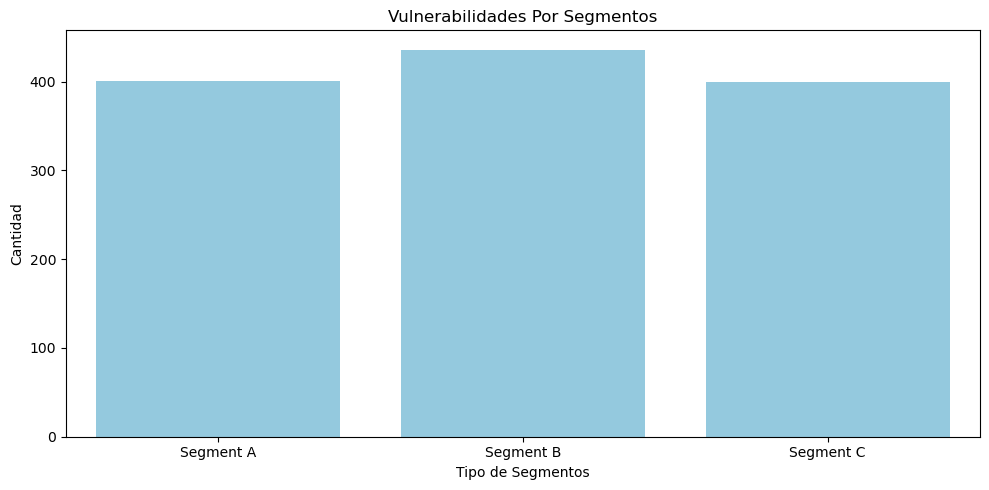

In [34]:
vulns_seg = df['Network Segment'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=vulns_seg.index, y=vulns_seg.values, color="skyblue")
plt.title("Vulnerabilidades Por Segmentos")
plt.xlabel("Tipo de Segmentos")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()



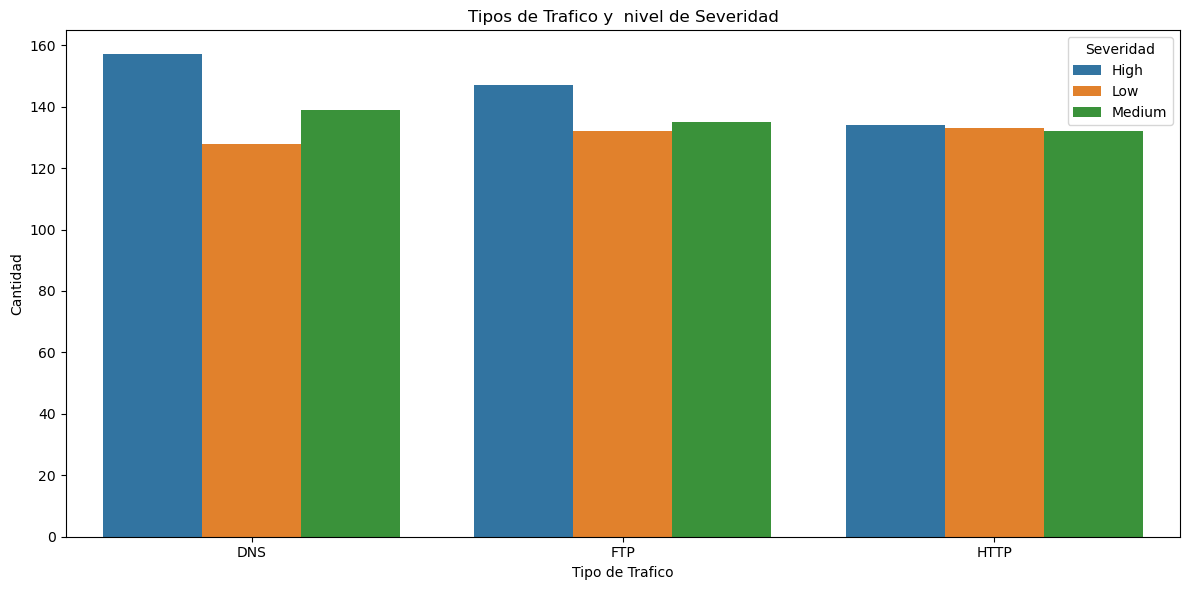

In [49]:
plt.figure(figsize=(12, 6))

# Agrupar por puerto de origen y protocolo
vulns_grouped = df.groupby(["Traffic Type", "Severity Level"]).size().reset_index(name="cantidad")

# Gráfico agrupado por 'year' y 'severity'
sns.barplot(data=vulns_grouped, x="Traffic Type", y="cantidad", hue="Severity Level")

plt.title("Tipos de Trafico y  nivel de Severidad")
plt.xlabel("Tipo de Trafico")
plt.ylabel("Cantidad")
plt.legend(title="Severidad")
plt.tight_layout()
plt.show()

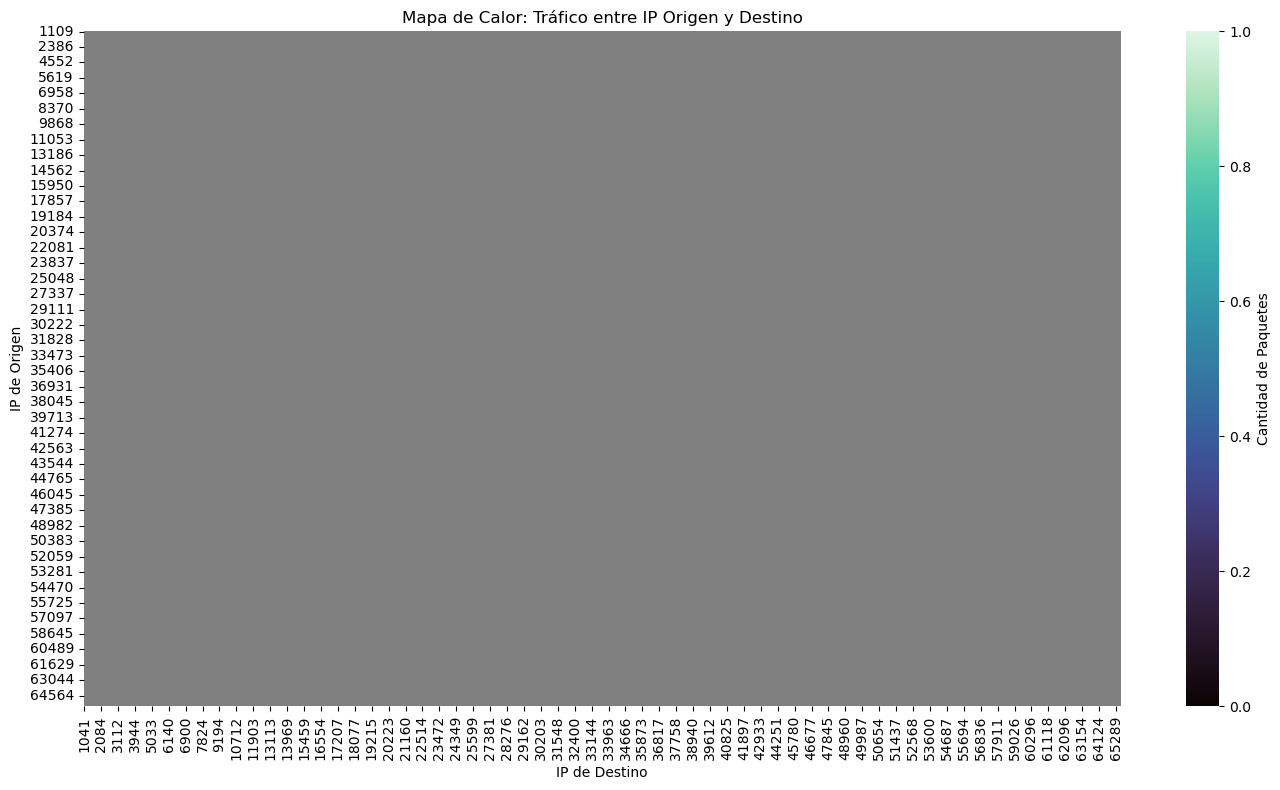

In [ ]:
# Paso 1: Tabla cruzada entre IPs

ip_matrix = df.pivot_table(
    index="Source Port",
    columns="Destination Port",
    aggfunc="size",   # Cuenta cuántas veces ocurre la combinación
    fill_value=0      # Rellena con 0 si no hay tráfico entre esas IPs
)
 
# Paso 2: Mapa de calor

plt.figure(figsize=(14, 8))
sns.heatmap(ip_matrix, cmap="mako", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Cantidad de Paquetes'})
plt.title("Mapa de Calor: Tráfico entre IP Origen y Destino")
plt.xlabel("IP de Destino")
plt.ylabel("IP de Origen")
plt.tight_layout()
plt.show()

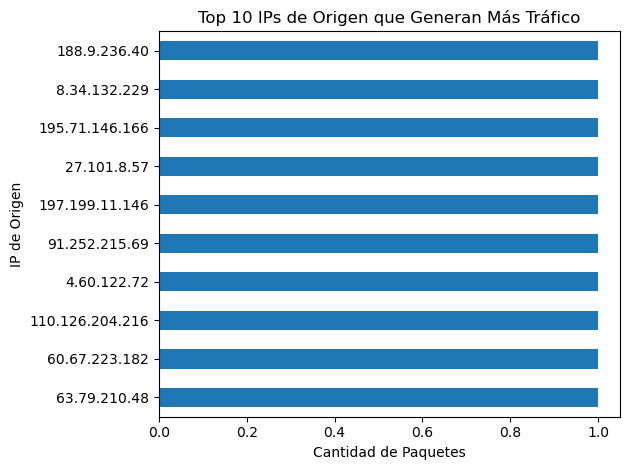

In [59]:
df["Source IP Address"].value_counts().head(10).plot(kind="barh")
 
plt.title("Top 10 IPs de Origen que Generan Más Tráfico")
plt.xlabel("Cantidad de Paquetes")
plt.ylabel("IP de Origen")
 
plt.tight_layout()
plt.show()